In [1]:
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(H5weaver)
quiet_library(dplyr)
#quiet_library(viridis)
#quiet_library(harmony)

# Load Object

In [2]:
so <- readRDS('/home/jupyter/UPenn_Demo/sp_merge_gating_celltype.rds')

# Explore Object

In [3]:
so

An object of class Seurat 
105056 features across 273866 samples within 14 assays 
Active assay: Tiles (5 features, 0 variable features)
 13 other assays present: RNA, ADT, SCT, prediction.score.celltype.l1, prediction.score.celltype.l2, prediction.score.celltype.l3, predicted_ADT, prediction.score.t_celltype.l1, prediction.score.t_celltype.l2, prediction.score.t_celltype.l3, x10_ADT, clean_gex, clean_adt
 8 dimensional reductions calculated: pca, umap, apca, adt_harmony, adtumap, lsit, atac_umap, wnn.3.umap

## UMAPs

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



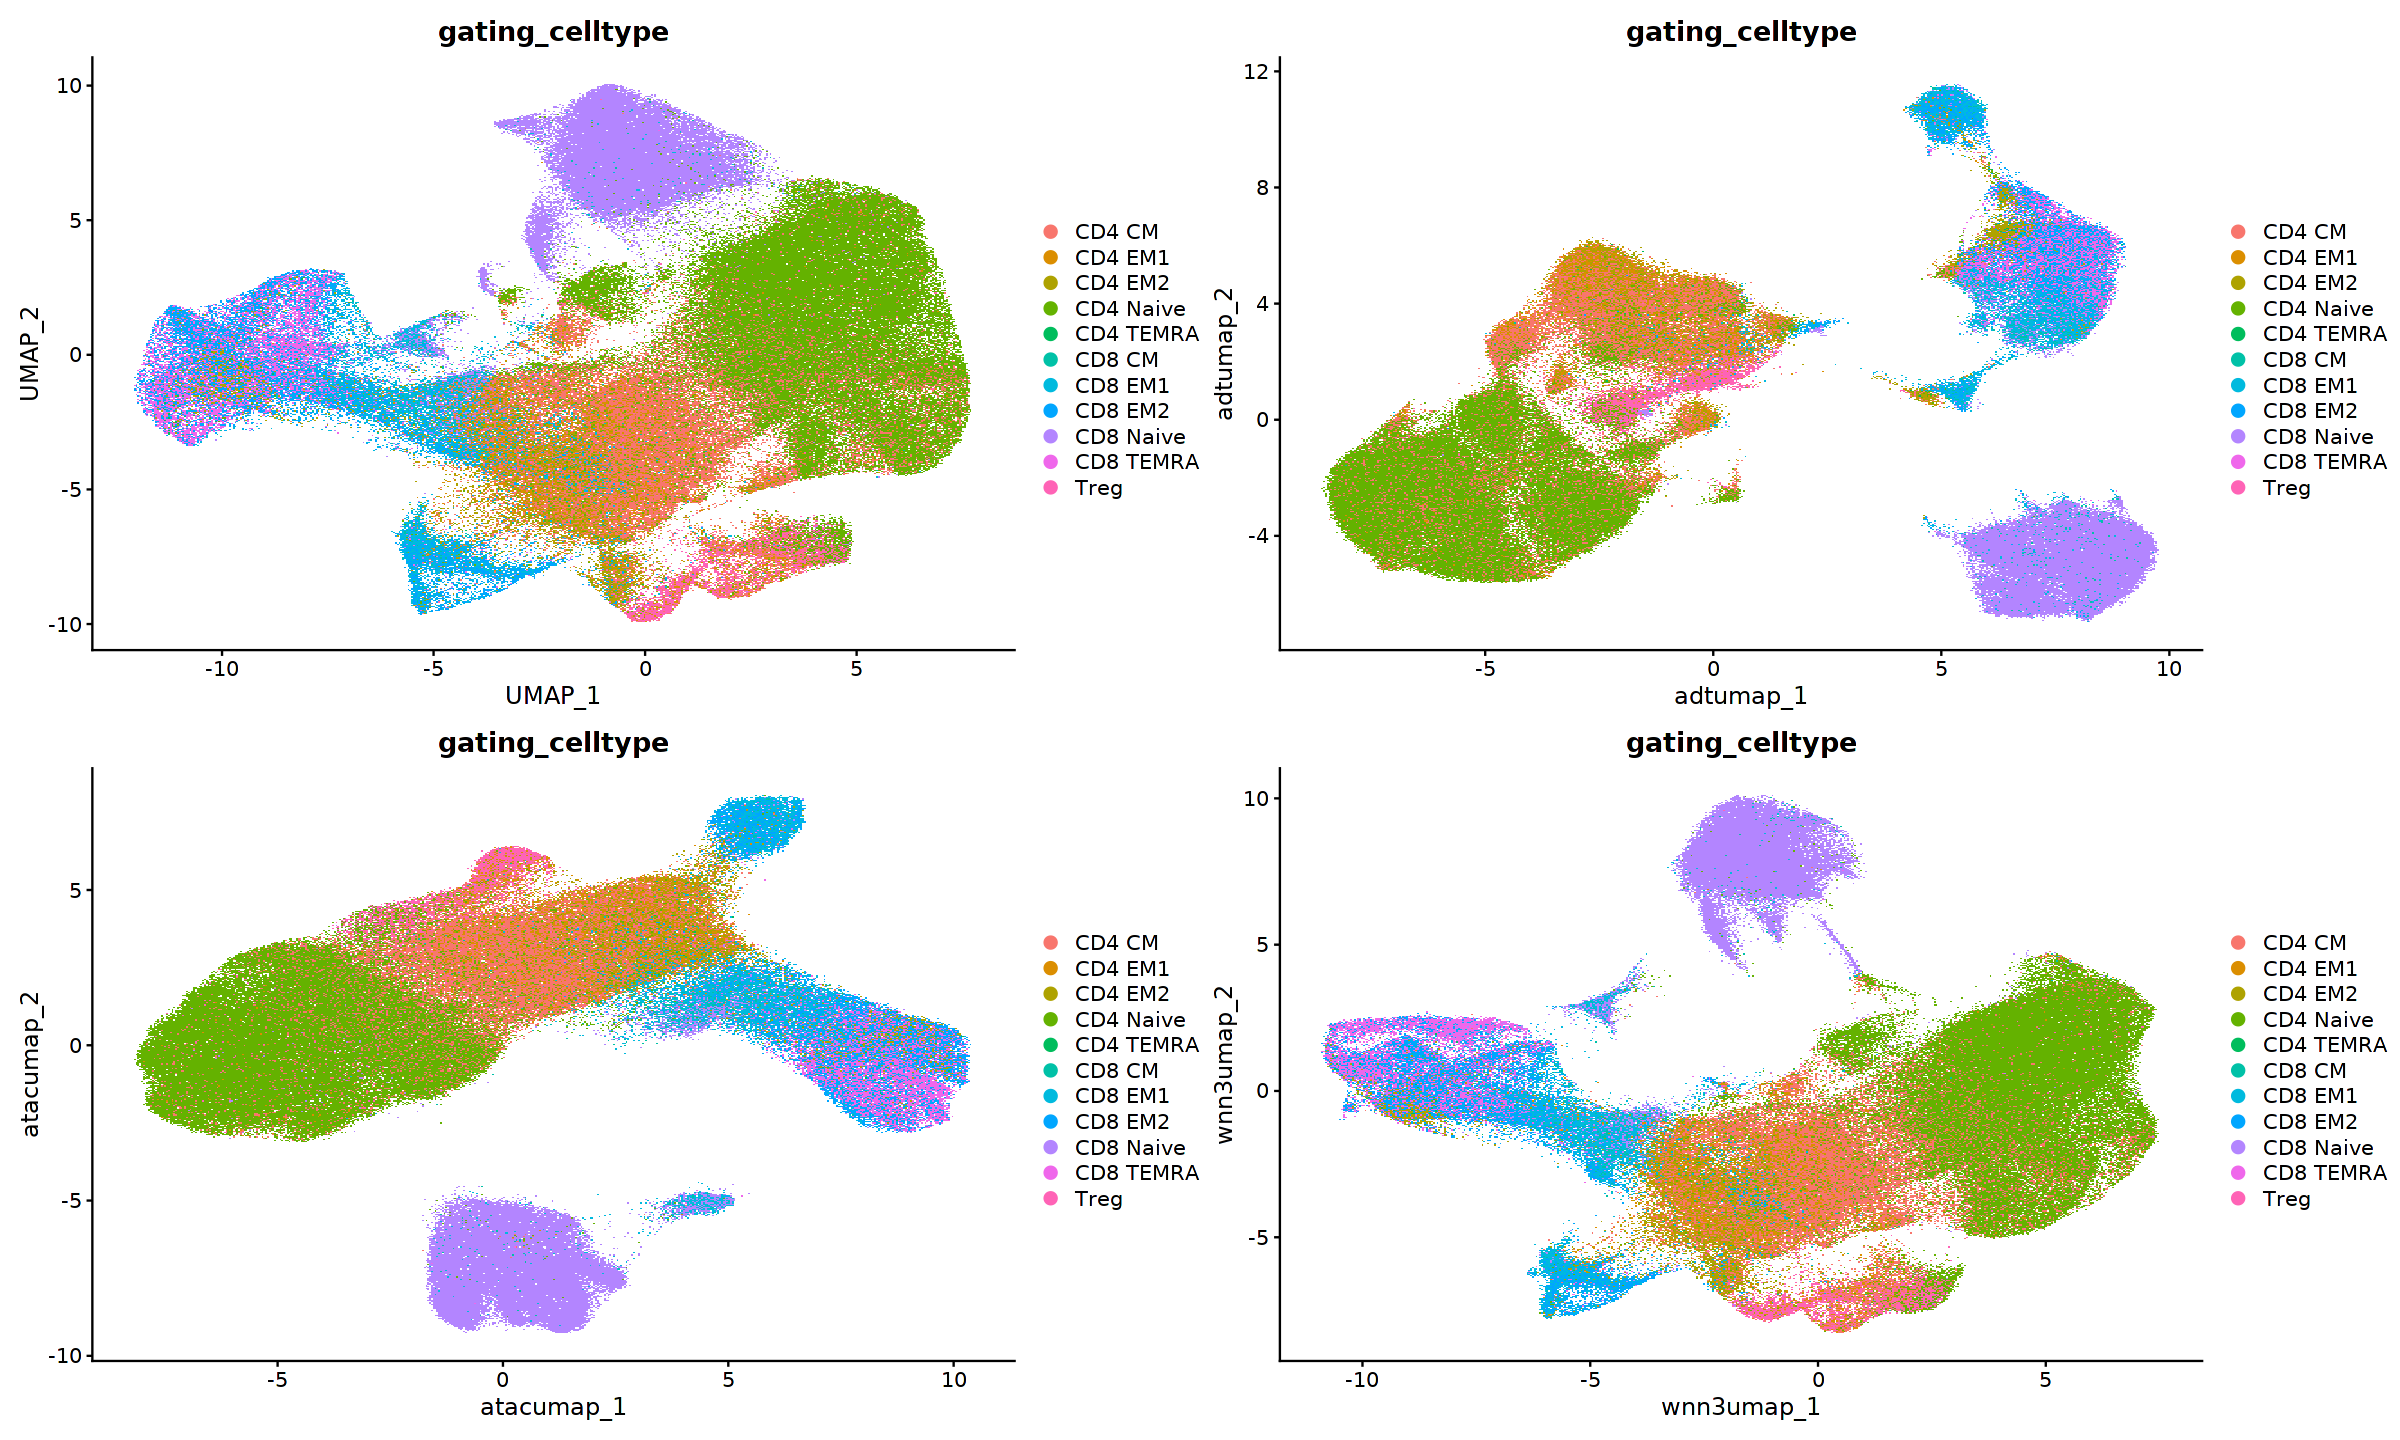

In [4]:
options(repr.plot.width = 20, repr.plot.height = 12)
p1 <- DimPlot(so, reduction = 'umap', group.by = 'gating_celltype', shuffle = TRUE)
p2 <- DimPlot(so, reduction = 'adtumap', group.by = 'gating_celltype', shuffle = TRUE)
p3 <- DimPlot(so, reduction = 'atac_umap', group.by = 'gating_celltype', shuffle = TRUE)
p4 <- DimPlot(so, reduction = 'wnn.3.umap', group.by = 'gating_celltype', shuffle = TRUE)
p1 + p2 + p3 + p4

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



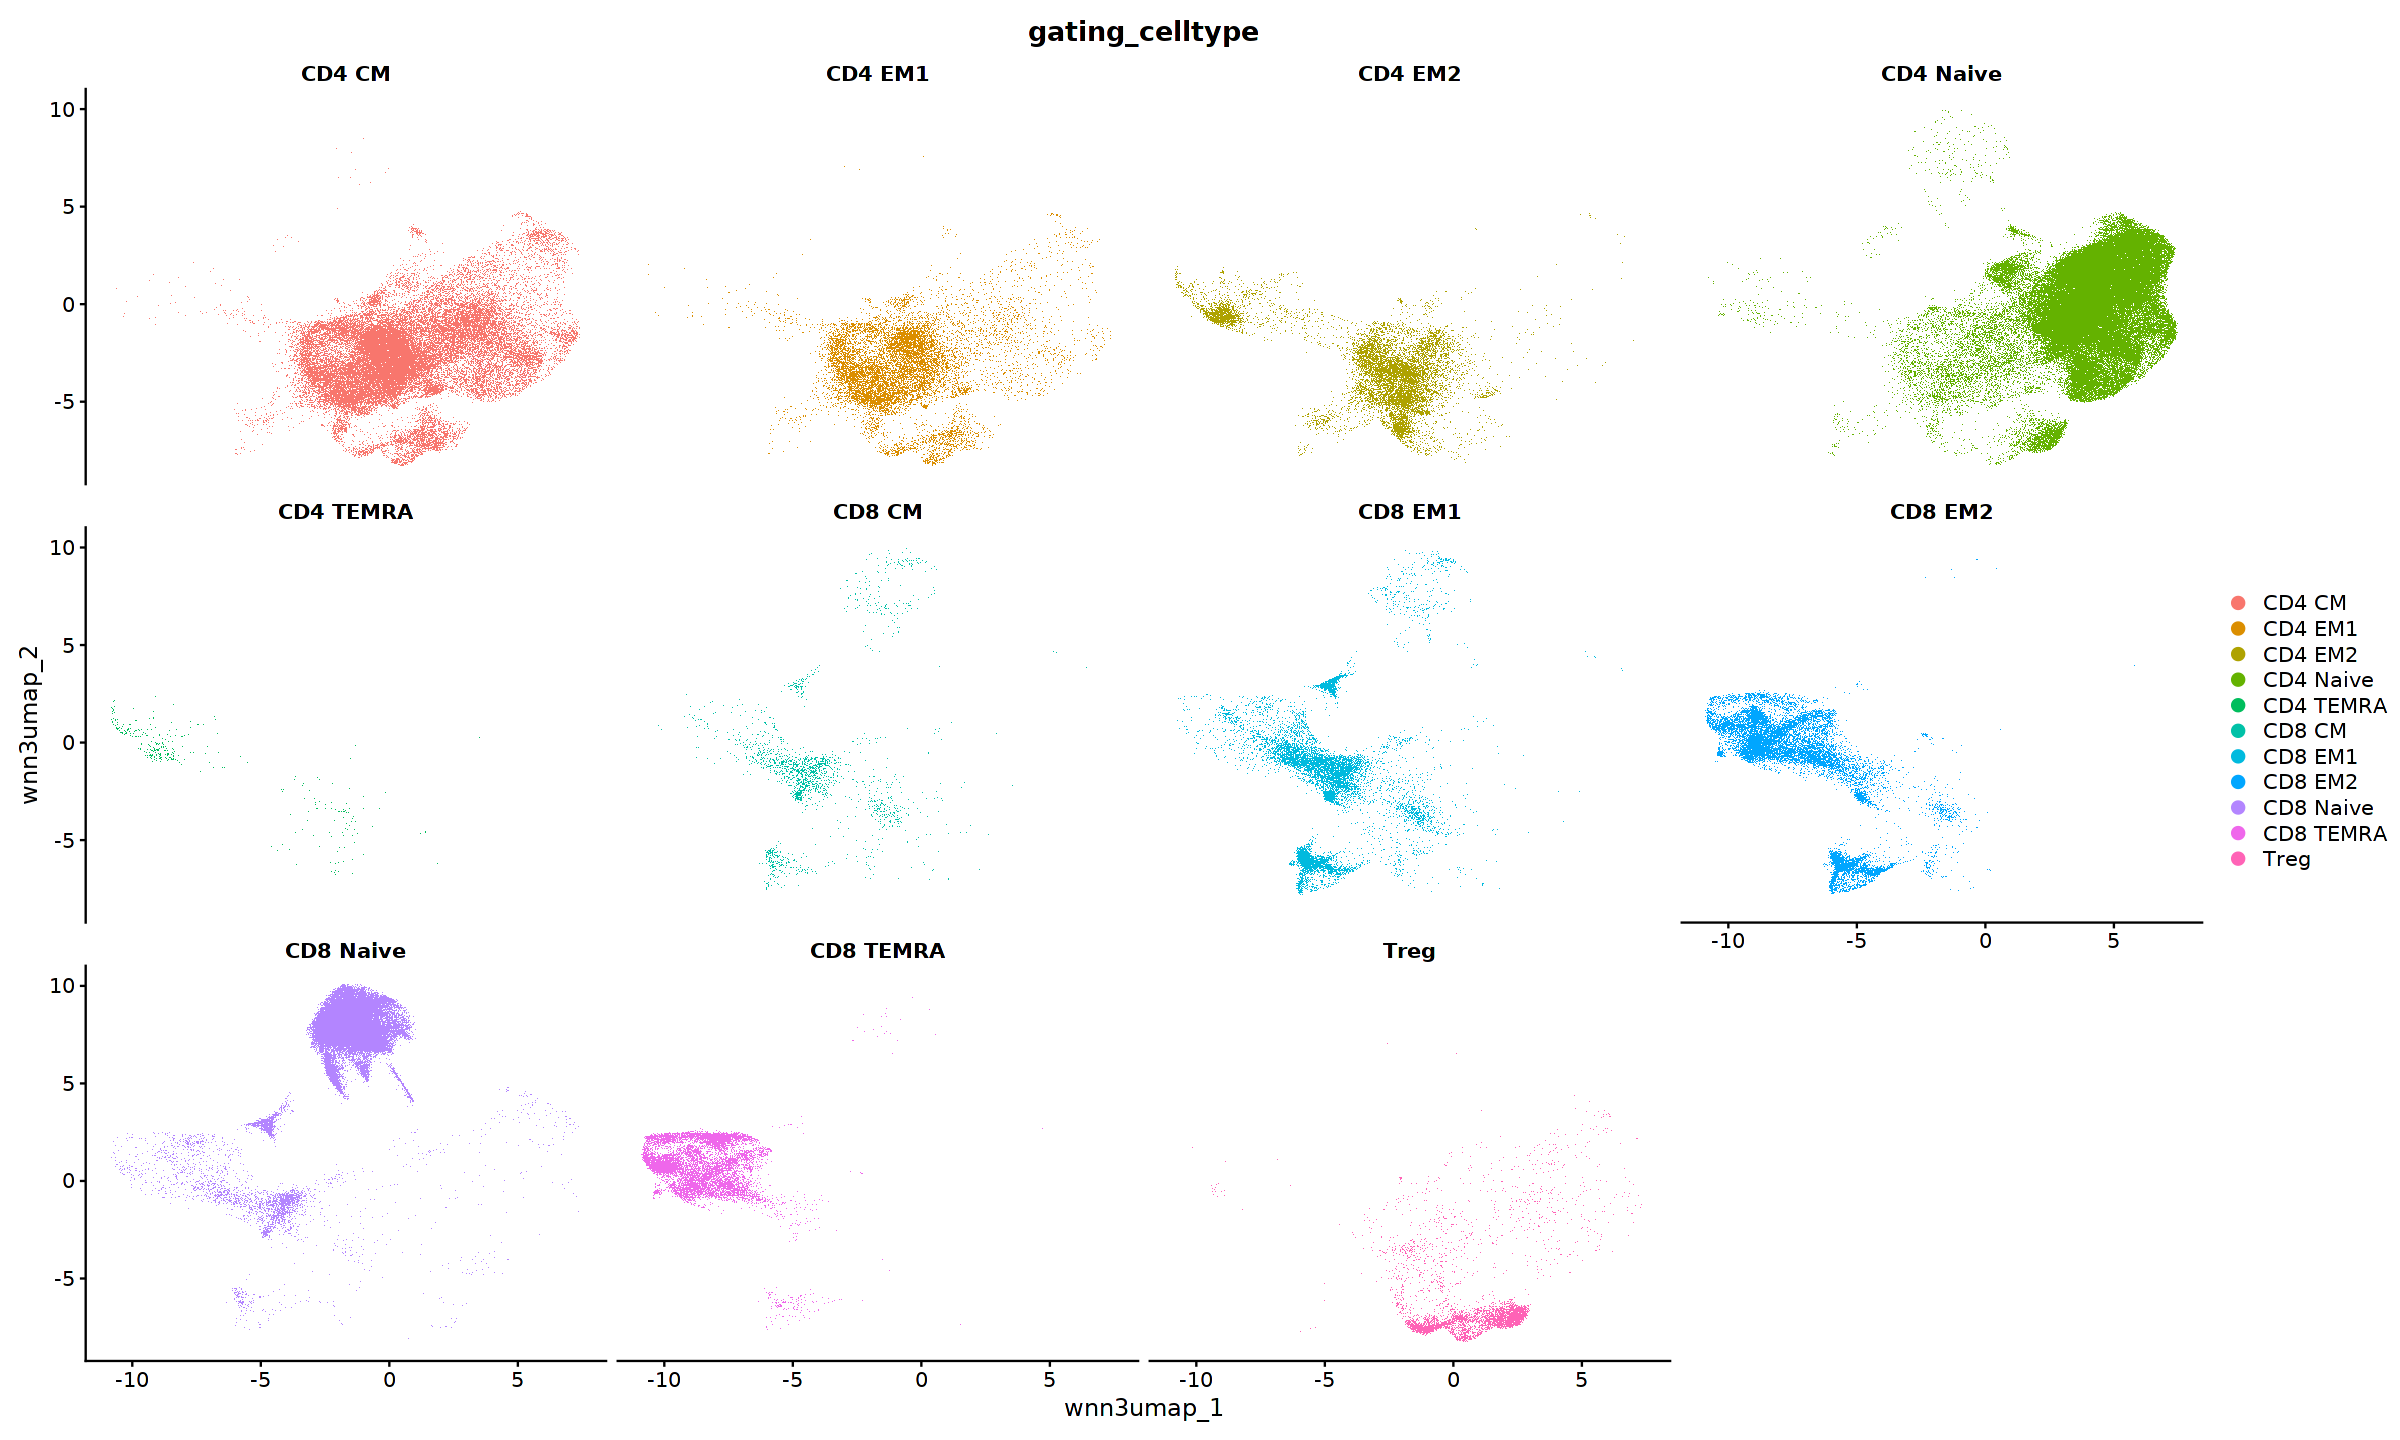

In [5]:
DimPlot(so, reduction = 'wnn.3.umap', group.by = 'gating_celltype', split.by = 'gating_celltype', ncol = 4)

# Subset & Re-cluster CD8 TEMRAs

In [6]:
so <- SetIdent(so, value = 'gating_celltype')
cd8_tem <- subset(so, idents = 'CD8 TEMRA')

In [7]:
cd8_tem <- suppressWarnings(SCTransform(cd8_tem, assay = 'clean_gex')) %>% RunPCA()

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 23660 by 11963

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 62 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 23660 genes



  |======================================================================| 100%


Computing corrected count matrix for 23660 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.948835 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

PC_ 1 
Positive:  SGCD, PLCB1, AKT3, NELL2, ANK3, NR3C2, BCL2, IL7R, SLC4A10, TAFA1 
	   MT-ND3, MBNL1, AL136456.1, IFNG-AS1, PHACTR2, RASGRF2, CBLB, PARP8, VAV3, SAMD12 
	   ADAM12, PCAT1, ZBTB16, IMMP2L, UST, PTPRM, PLCL1, PRKN, GPHN, IKZF2 
Negative:  GNLY, HLA-C, ST8SIA1, B2M, NKG7, LINC01505, CEMIP2, HLA-B, MYO3B, CSGALNACT1 
	   ITGB1, CCL5, PPP1R16B, MIR181A1HG, ESYT2, TRBC2, PARD6G, P2RY8, MSC-AS1, AC243829.2 
	   WAKMAR2, ARHGAP10, TGFBR3, ATP10A, DOK6, TFDP2, TNFAIP3, PRSS23, RAB8B, NR3C1 
PC_ 2 
Positive:  SLC4A10, AL136456.1, THEMIS, ADAM12, IFNG-AS1, CAMK4, DLEU1, IL7R, ZBTB16, ME1 
	   RORA, DPP4, SAMD12, PAG1, PLCB1, LINC01644, CDC14A, BCL2, RUNX2, ANTXR2 
	   PTPN13, RASGRF2, GZMK, NELL2, IL23R, BACH2, AFF3, HLA-C, EML4, INPP4B 
Negative:  IKZF2, SGCD, AC093865.1, BNC2

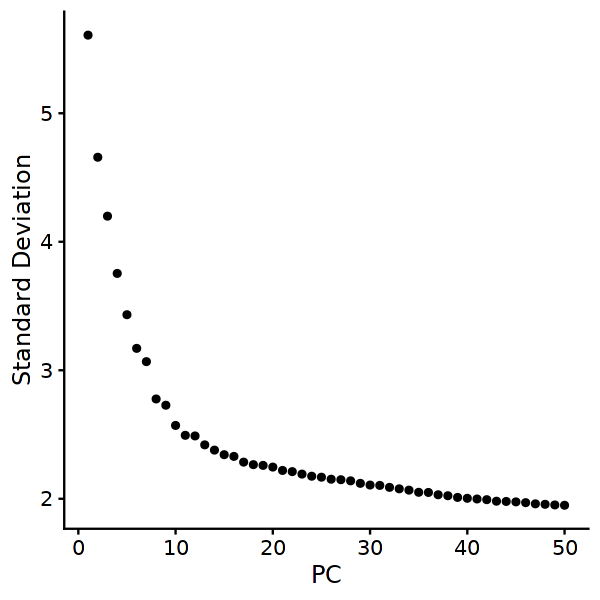

In [8]:
options(repr.plot.width = 5, repr.plot.height = 5)
ElbowPlot(cd8_tem, ndims = 50)

In [9]:
cd8_tem <- RunUMAP(cd8_tem, dims = 1:10) %>% FindNeighbors(dims = 1:10) %>% FindClusters(resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
19:53:41 UMAP embedding parameters a = 0.9922 b = 1.112

19:53:41 Read 11963 rows and found 10 numeric columns

19:53:41 Using Annoy for neighbor search, n_neighbors = 30

19:53:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:53:43 Writing NN index file to temp file /tmp/RtmpZqZeej/file26f33ad86db

19:53:43 Searching Annoy index using 1 thread, search_k = 3000

19:53:47 Annoy recall = 100%

19:53:48 Commencing smooth kNN distance calibration using 1 thread

19:53:49 Initializing fro

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11963
Number of edges: 380646

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8633
Number of communities: 10
Elapsed time: 2 seconds


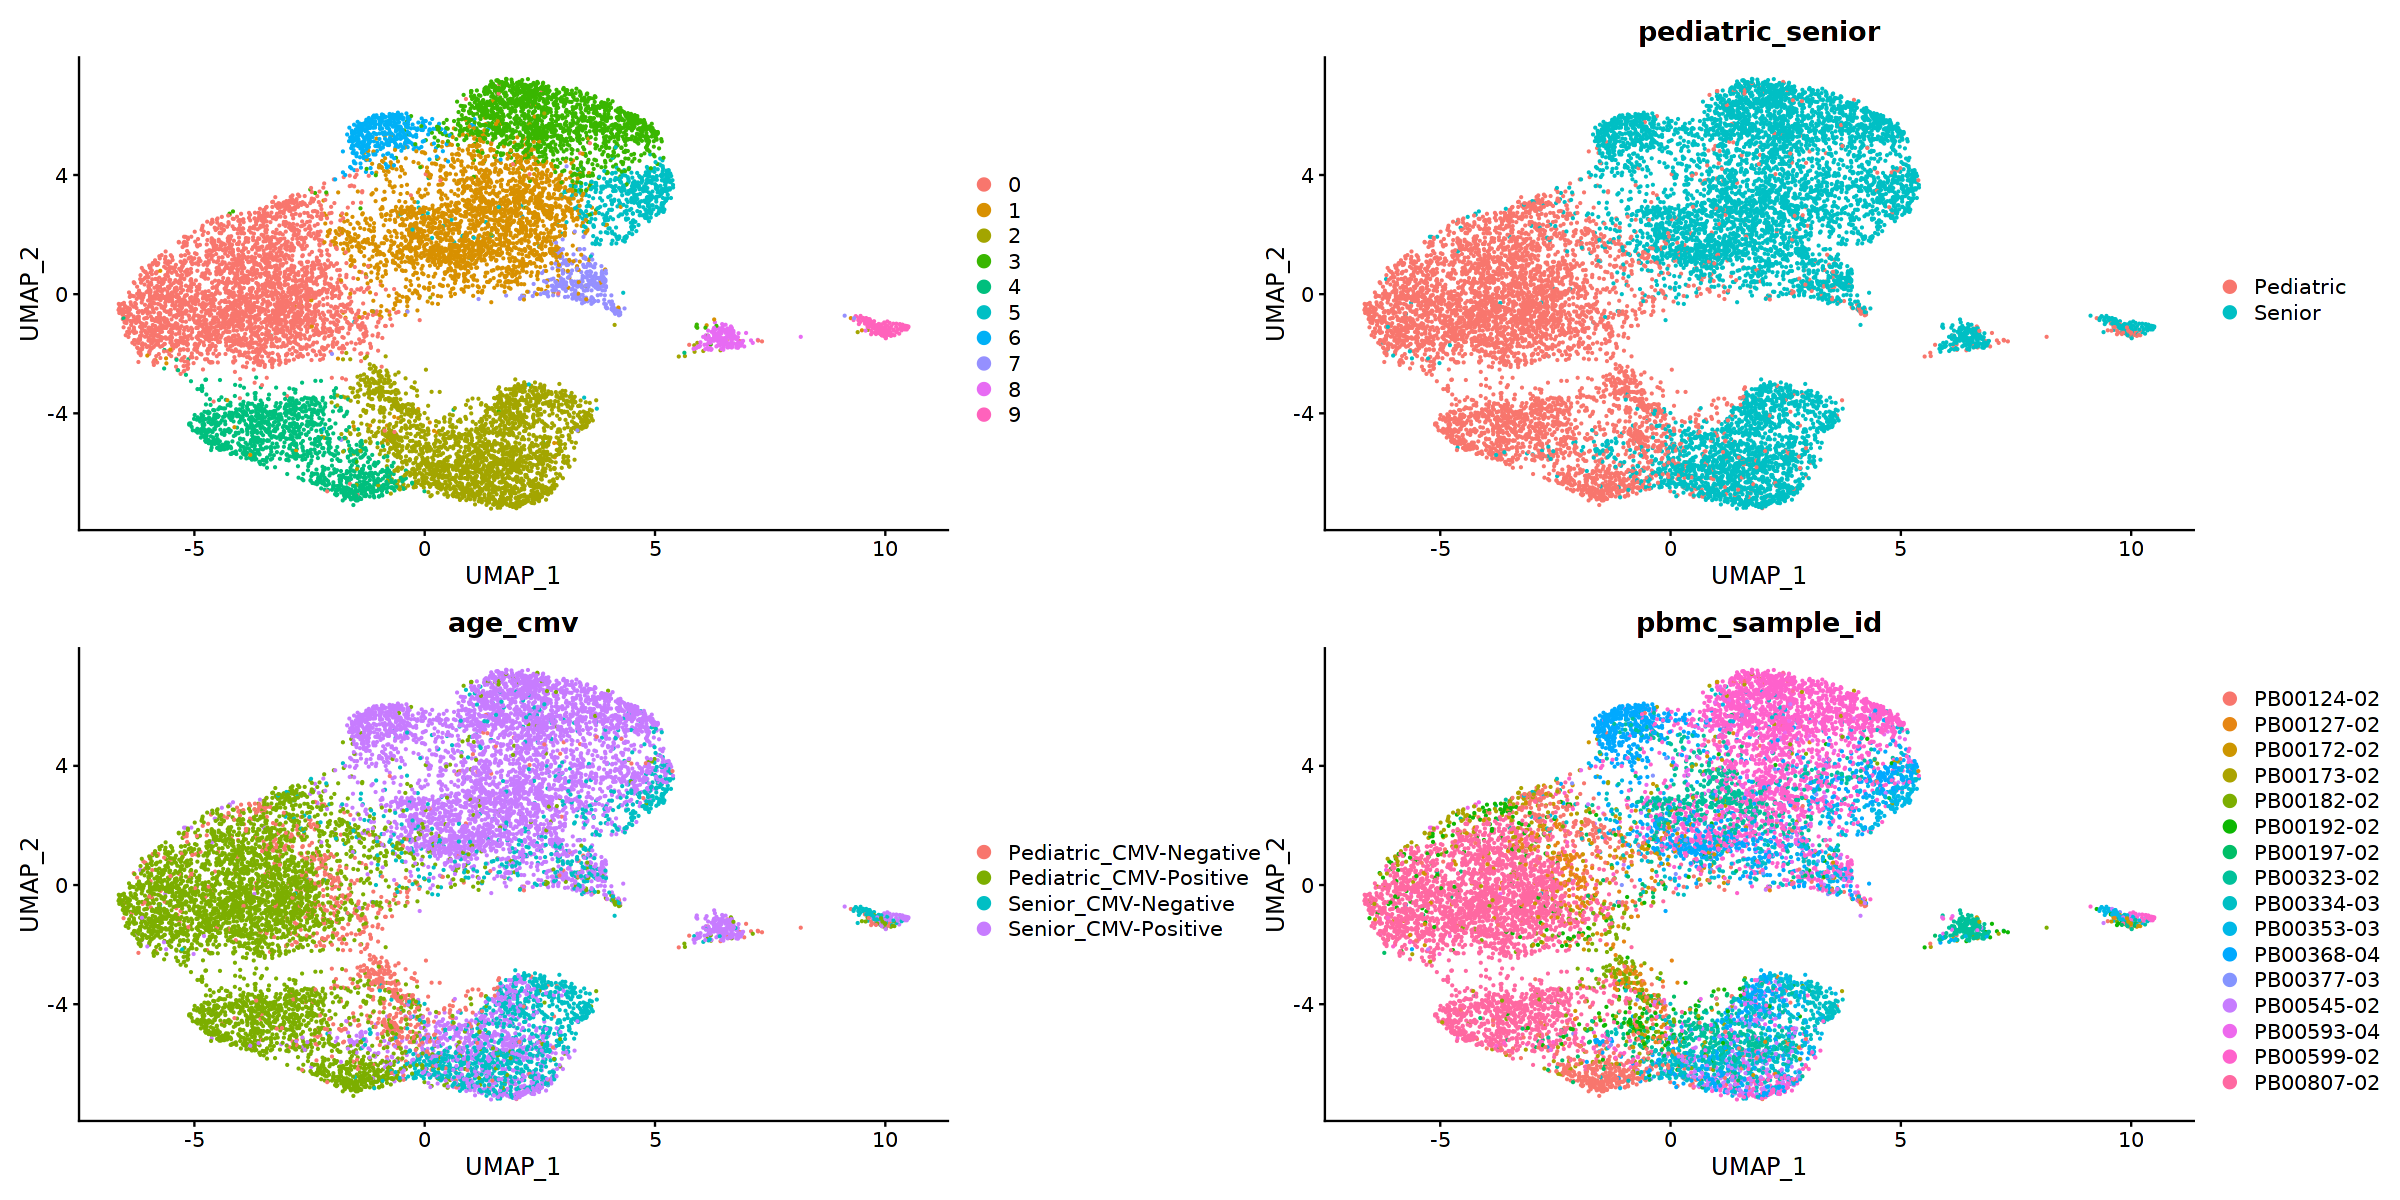

In [10]:
options(repr.plot.width = 20, repr.plot.height = 10)
p1 <- DimPlot(cd8_tem, reduction = 'umap', shuffle = TRUE)
p2 <- DimPlot(cd8_tem, reduction = 'umap', group.by = 'pediatric_senior', shuffle = TRUE)
p3 <- DimPlot(cd8_tem, reduction = 'umap', group.by = 'age_cmv', shuffle = TRUE)
p4 <- DimPlot(cd8_tem, reduction = 'umap', group.by = 'pbmc_sample_id', shuffle = TRUE)
p1 + p2 + p3 + p4

In [11]:
rna_markers <- FindAllMarkers(cd8_tem, max.cells.per.ident = 500)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [12]:
rna_markers %>%
    group_by(cluster) %>%
    top_n(n = 15, wt = avg_log2FC) -> top10

Warning message in DoHeatmap(cd8_tem, features = top10$gene, assay = "SCT"):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: RBMS1, IL18RAP, TRGC1, PATL2, CEP78, FYB1, CD52, PSME4, DUSP2, FGFBP2, CD6”


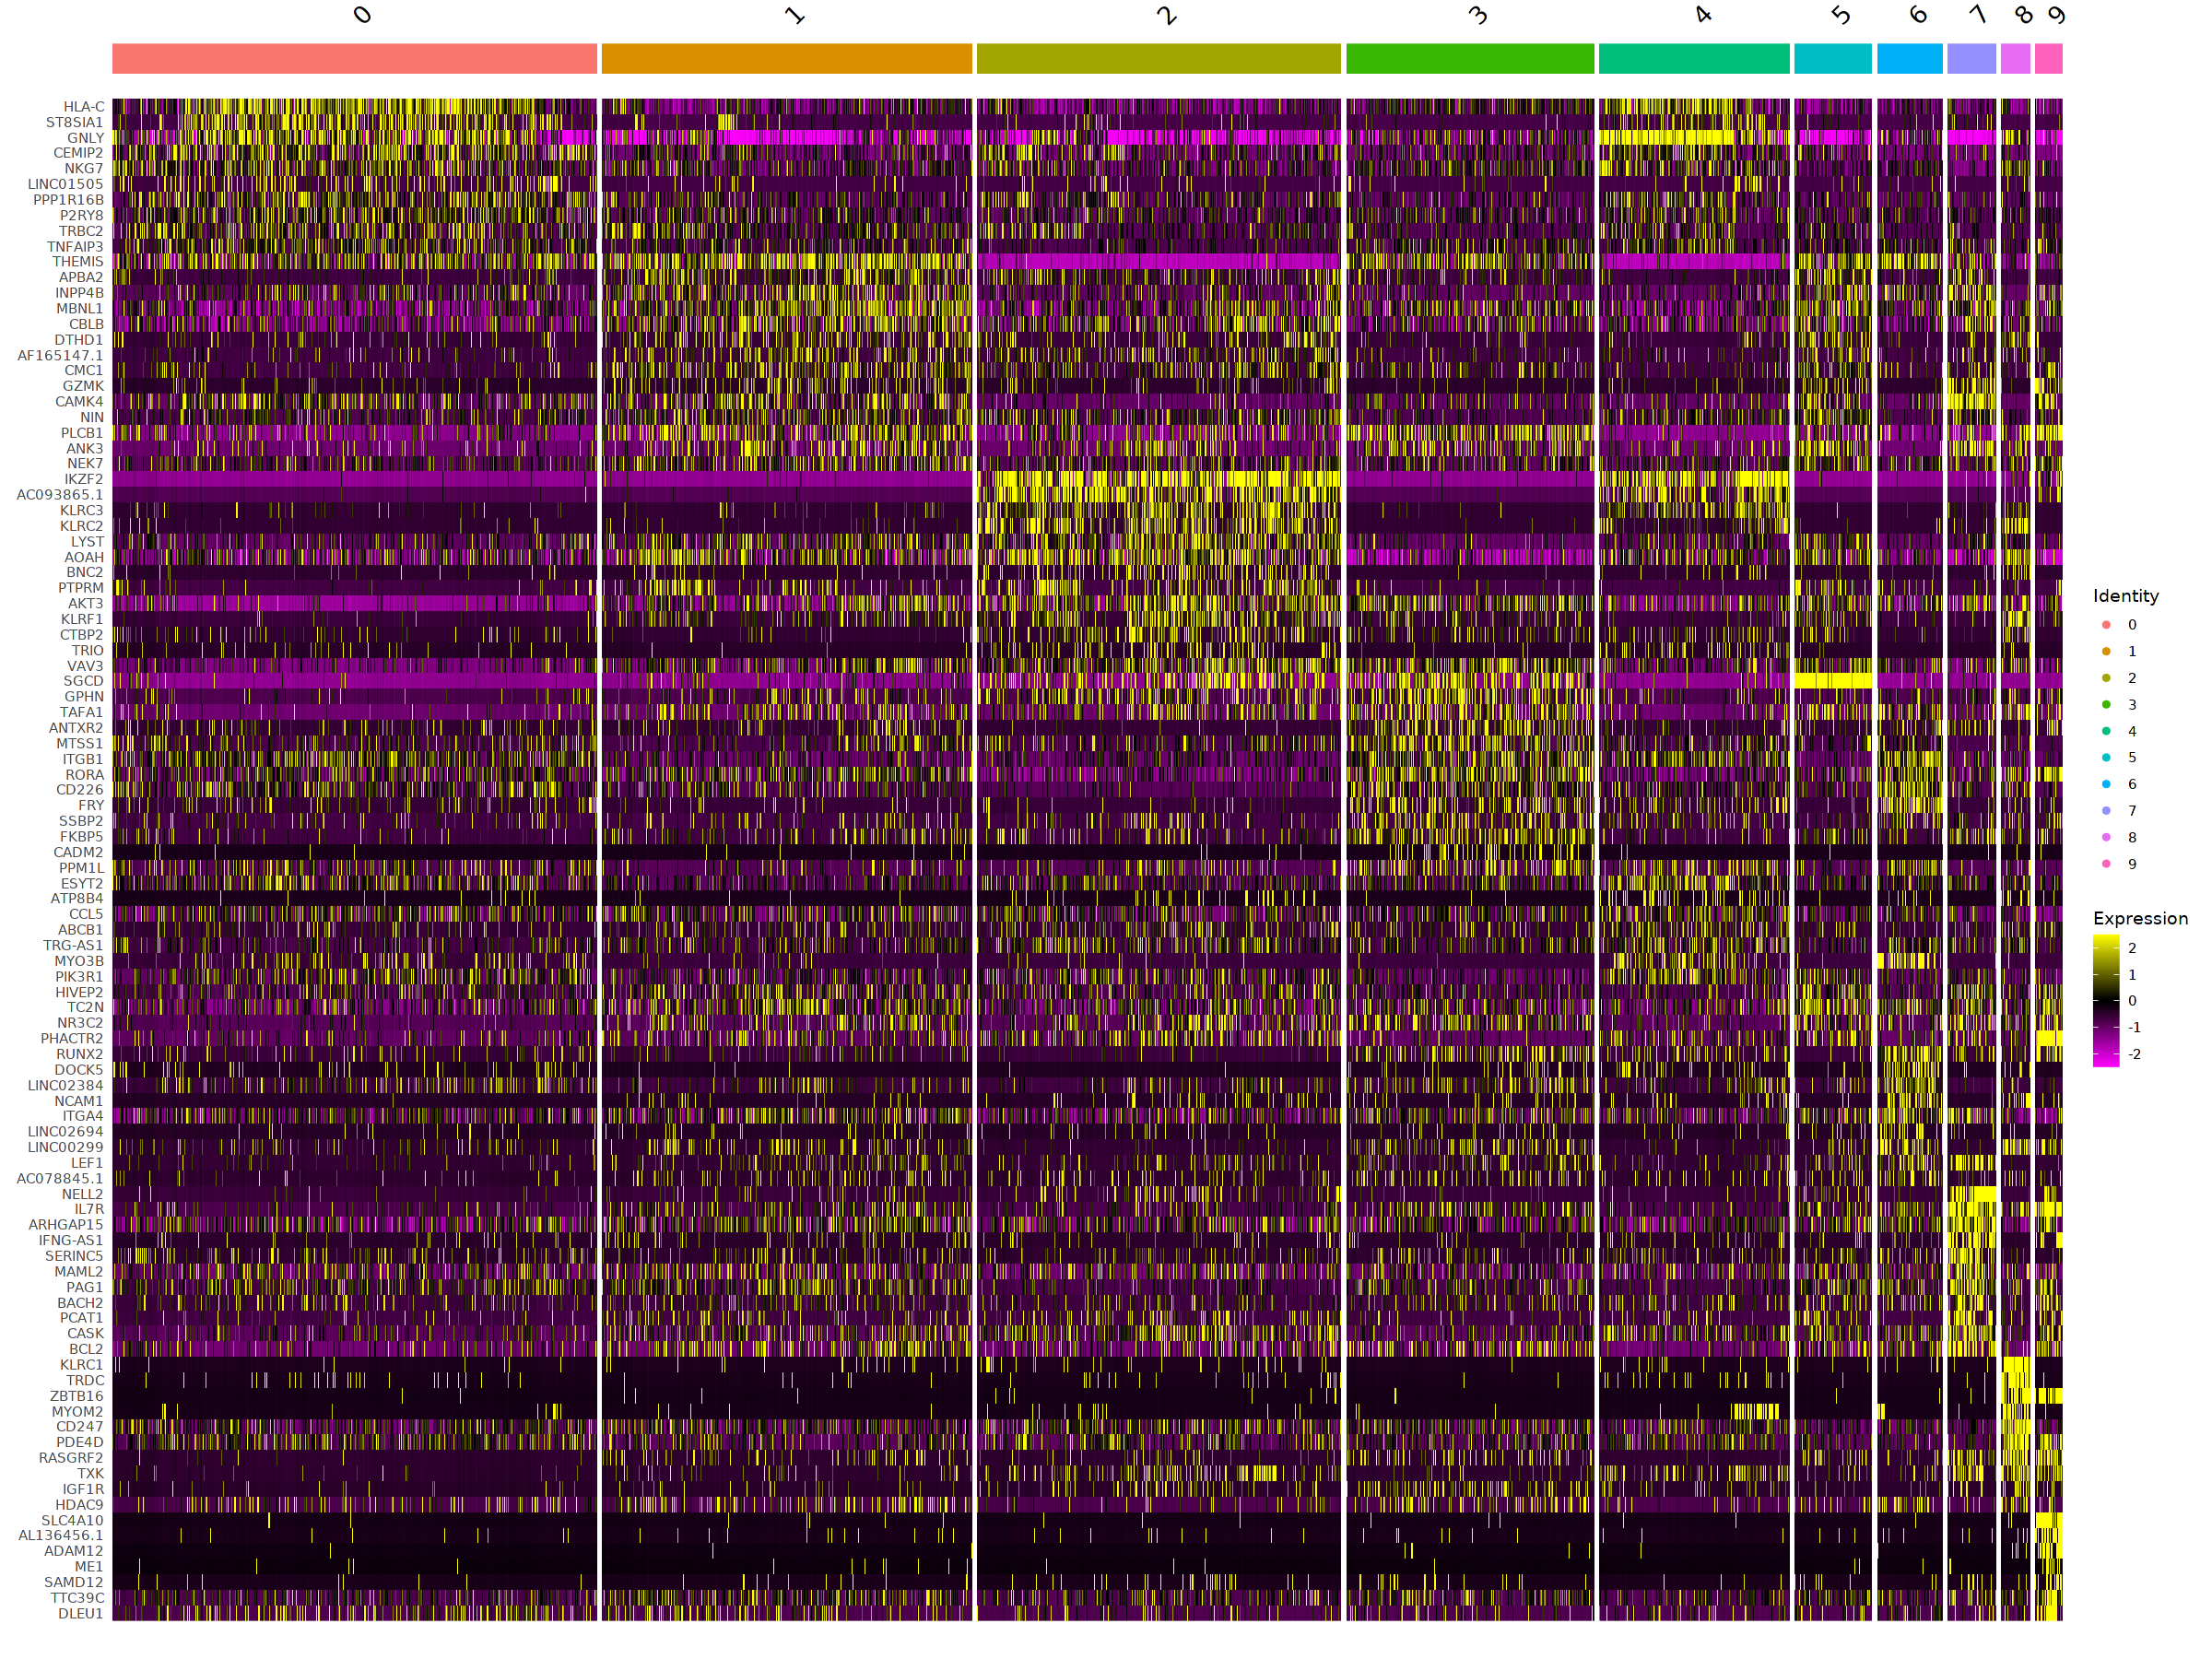

In [13]:
options(repr.plot.width = 20, repr.plot.height = 15)
DoHeatmap(cd8_tem, features = top10$gene, assay = 'SCT')

In [15]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_1.0.7        H5weaver_1.2.0     rhdf5_2.36.0       data.table_1.14.2 
[5] Matrix_1.4-0       ggplot2_3.3.5      SeuratObject_4.0.4 Seurat_4.0.6      

loaded via a namespace (and not attached):
  [1] Rtsne_0.15            colorspace_2.0-2      deldir_1.0-6         
  [4] ellipsis_0.3.2        ggridges